# Manually Plot Feature Importance

A trained XGBoost model automatically calculates feature importance on your predictive modeling problem. These importance scores are available in the feature importances member variable of the trained model. 

[ 0.089701    0.17109634  0.08139535  0.04651163  0.10465116  0.2026578
  0.1627907   0.14119601]


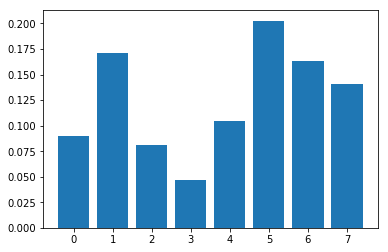

In [1]:
#Load Libraries
from pandas import read_csv
from xgboost import XGBClassifier
from matplotlib import pyplot

#Load Data and split
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data'
data = read_csv(url, header=None, delimiter = ",")
X = data.values[:,0:8]
Y = data.values[:,8]

#Fit model
model = XGBClassifier()
model.fit(X, Y)

#Feature Importance
print(model.feature_importances_)

#plot
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()

A downside of this plot is that the features are ordered by their input index rather than their importance. We could sort the features before plotting. Thankfully, there is a built in plot function to help us.

# Using Built-in XGBoost Feature Importance Plot

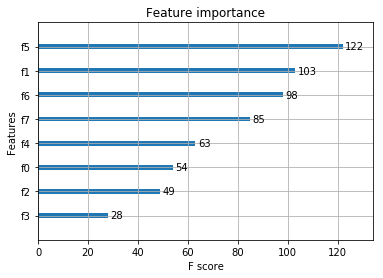

In [2]:
from pandas import read_csv
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot

#Load Data and split
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data'
data = read_csv(url, header=None, delimiter = ",")
X = data.values[:,0:8]
Y = data.values[:,8]

#Fit model
model = XGBClassifier()
model.fit(X, Y)

#plot feature importance
plot_importance(model)
pyplot.show()

Manually mapping these indices to names in the problem description1, we can see that the plot shows F5 (body mass index) has the highest importance and F3 (skin fold thickness) has the lowest importance.

# Feature Selection with XGBoost Feature Importance Scores

Feature importance scores can be used for feature selection in scikit-learn. This is done using the SelectFromModel class that takes a model and can transform a dataset into a subset with selected features. 

In [15]:
#Load Libraries
from pandas import read_csv
from numpy import sort
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

#Load Data and split
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data'
data = read_csv(url, header=None, delimiter = ",")
X = data.values[:,0:8]
Y = data.values[:,8]

#Split Train/Test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 7)

#Fit model
model = XGBClassifier()
model.fit(X_train, Y_train)

#Predict and Evaluate
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

#Fit model using each importance as a threshold
thresholds = sort(model.feature_importances_)
for thresh in thresholds:
    #Select features using threshold
    selection = SelectFromModel(model, threshold = thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    #Train Model
    selection_model = XGBClassifier()
    selection_model.fit(select_X_train, Y_train)
    #Evaluate
    select_X_test = selection.transform(X_test)
    y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(Y_test, predictions)
    print("Thres=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Accuracy: 77.95%
Thres=0.071, n=8, Accuracy: 77.95%
Thres=0.073, n=7, Accuracy: 76.38%
Thres=0.084, n=6, Accuracy: 77.56%
Thres=0.090, n=5, Accuracy: 76.38%
Thres=0.128, n=4, Accuracy: 76.38%
Thres=0.160, n=3, Accuracy: 74.80%
Thres=0.186, n=2, Accuracy: 71.65%
Thres=0.208, n=1, Accuracy: 63.78%


We can see that the performance of the model generally decreases with the number of selected features. On this problem there is a trade-off of features to test set accuracy and we could decide to take a less complex model (fewer attributes such as n=4) and accept a modest decrease in estimated accuracy from 77.95% down to 76.38%. This is likely to be a wash on such a small dataset, but may be a more useful strategy on a larger dataset and using cross-validation as the model evaluation scheme.
